In [1]:
import pandas as pd
from keras.models import load_model
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from random import randint

### Importing Clean Datasets:

In [2]:
# Combined dataset
df = pd.read_csv("/content/drive/MyDrive/clean_dataset.csv")
c_X = df.CleanText
c_Y = df.Score

In [3]:
df.head()

,Unnamed: 0,Text,Score,CleanText
0,76007,These great little candies are quite addictive...,1,"['These', 'great', 'little', 'candies', 'quite..."
1,368315,I bought this and thought it was a good deal.....,0,"['bought', 'thought', 'good', 'deal', 'WRONG',..."
2,450447,The Red Caviar is very fresh and melts in my m...,1,"['The', 'Red', 'Caviar', 'fresh', 'melts', 'mo..."
3,463208,I came back to see if these were still availab...,1,"['came', 'back', 'see', 'still', 'available', ..."
4,178408,I love this Black Truffle sea salt! I purchas...,1,"['love', 'Black', 'Truffle', 'sea', 'salt', 'p..."


In [4]:
# TripAdvisor
tadf = pd.read_csv("/content/drive/MyDrive/CU/6502/ta_clean.csv")
ta_X = tadf.CleanText
ta_Y = tadf.Score 

In [5]:
tadf.head()

,Unnamed: 0,Text,Score,CleanText
0,0,nice hotel expensive parking got good deal sta...,1,"['nice', 'hotel', 'expensive', 'parking', 'got..."
1,1,ok nothing special charge diamond member hilto...,0,"['ok', 'nothing', 'special', 'charge', 'diamon..."
2,3,"unique, great stay, wonderful time hotel monac...",1,"['unique', 'great', 'stay', 'wonderful', 'time..."
3,4,"great stay great stay, went seahawk game aweso...",1,"['great', 'stay', 'great', 'stay', 'went', 'se..."
4,5,love monaco staff husband stayed hotel crazy w...,1,"['love', 'monaco', 'staff', 'husband', 'stayed..."


In [6]:
# Twitter
tdf = pd.read_csv("/content/drive/MyDrive/CU/6502/twitter_clean.csv")
t_X = tdf.CleanText
t_Y = tdf.Score 

In [7]:
tdf.head()

,Unnamed: 0,Text,Score,CleanText
0,369646,"Made it to the end of the week, but not the en...",0,"['Made', 'end', 'week', 'end', 'work', 'Have',..."
1,188770,@foiledcupcakes I just moved back north to Des...,0,"['moved', 'back', 'north', 'Des', 'Plaines', '..."
2,697712,is bored as andre is playing on the wii,0,"['bored', 'andre', 'playing', 'wii']"
3,582491,&quot;Other half&quot; had to choose tonight t...,0,"['quotOther', 'halfquot', 'choose', 'tonight',..."
4,400049,i wanna go to my cousin's houseee,0,"['wanna', 'go', 'cousins', 'houseee']"


In [8]:
# Amazon
adf = pd.read_csv("/content/drive/MyDrive/CU/6502/amazon_clean.csv")
a_X = adf.CleanText
a_Y = adf.Score 

In [9]:
adf.head()

,Unnamed: 0,Text,Score,CleanText
0,476225,I first tried this as a gift from a co-worker....,1,"['first', 'tried', 'gift', 'coworker', 'like',..."
1,196212,"If you use a lot of this item, you can save so...",1,"['If', 'use', 'lot', 'item', 'save', 'real', '..."
2,172815,"We drink this for the probiotics, but we usual...",1,"['We', 'drink', 'probiotics', 'usually', 'add'..."
3,549944,Pacific Natural Foods Hemp Milk is one of the ...,1,"['Pacific', 'Natural', 'Foods', 'Hemp', 'Milk'..."
4,104420,These chips are awesome! All natural (even the...,1,"['These', 'chips', 'awesome', 'All', 'natural'..."


In [10]:
# IMDB
imdbdf = pd.read_csv("/content/drive/MyDrive/CU/6502/imdb_clean.csv")
i_X = imdbdf.CleanText
i_Y = imdbdf.Score 

In [11]:
imdbdf.head()

,Unnamed: 0,Text,Score,CleanText
0,0,One of the other reviewers has mentioned that ...,1,"['One', 'reviewers', 'mentioned', 'watching', ..."
1,1,A wonderful little production. <br /><br />The...,1,"['wonderful', 'little', 'production', 'br', 'b..."
2,2,I thought this was a wonderful way to spend ti...,1,"['thought', 'wonderful', 'way', 'spend', 'time..."
3,3,Basically there's a family where a little boy ...,0,"['Basically', 'theres', 'family', 'little', 'b..."
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"['Petter', 'Matteis', 'Love', 'Time', 'Money',..."


In [12]:
# test data - clothing reviews
testdf = pd.read_csv("/content/drive/MyDrive/CU/6502/test.csv")
testing_X = testdf.CleanText
testing_Y = testdf.Rating

In [13]:
testdf.head()

,Unnamed: 0,Text,Rating,CleanText
0,0,Absolutely wonderful - silky and sexy and comf...,1,"['Absolutely', 'wonderful', 'silky', 'sexy', '..."
1,1,Love this dress! it's sooo pretty. i happene...,1,"['Love', 'dress', 'sooo', 'pretty', 'happened'..."
2,2,I had such high hopes for this dress and reall...,0,"['high', 'hopes', 'dress', 'really', 'wanted',..."
3,3,"I love, love, love this jumpsuit. it's fun, fl...",1,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f..."
4,4,This shirt is very flattering to all due to th...,1,"['This', 'shirt', 'flattering', 'due', 'adjust..."


### Visualization using word clouds

In [46]:
def plot_word_cloud(dataset, title):
  text = ''
  for i in range(0,20):
    idx = randint(0,len(dataset))
    # print(idx)
    # print(dataset.Text[idx])
    text += dataset.Text[idx]
  wordcloud = WordCloud(background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.show()


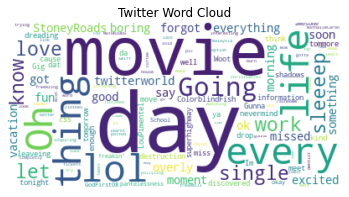

In [47]:
plot_word_cloud(tdf, "Twitter Word Cloud")

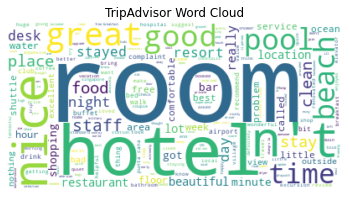

In [48]:
plot_word_cloud(tadf, "TripAdvisor Word Cloud")

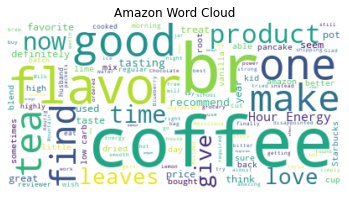

In [49]:
plot_word_cloud(adf, "Amazon Word Cloud")

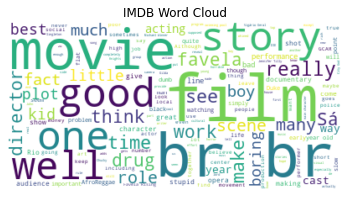

In [54]:
plot_word_cloud(imdbdf, "IMDB Word Cloud")

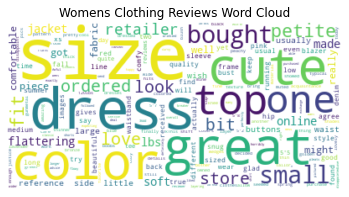

In [55]:
plot_word_cloud(testdf, "Womens Clothing Reviews Word Cloud")

Preparing data for training:
- Tokenization
- Encode words to numbers using text-to-sequences
- Pad sequences to ensure same size

In [14]:
def process_data(train_data):
  max_len = 500
  tok = Tokenizer(num_words=2000)
  tok.fit_on_texts(train_data)
  sequences = tok.texts_to_sequences(train_data)
  seq_matrix = sequence.pad_sequences(sequences, maxlen = max_len)
  return seq_matrix

In [15]:
ama_sequences_matrix = process_data(a_X)    #Amazon
imdb_sequences_matrix = process_data(i_X)   #IMDB
ta_sequences_matrix = process_data(ta_X)    #TripAdvisor
t_sequences_matrix = process_data(t_X)      #Twitter
c_sequences_matrix = process_data(c_X)      #Combined
test_sequences_matrix = process_data(testing_X)   #Test

### Creating train-test split using sklearn
### Using 9:1 ratio since we plan on testing on new set. 
### Sizing down test set to 10% of its size. 

In [16]:
TEST_X, test_x,TEST_Y, test_y = train_test_split(test_sequences_matrix, testing_Y, test_size=0.9, random_state=42)

In [17]:
aX_train, aX_test, aY_train, aY_test = train_test_split(ama_sequences_matrix, a_Y, test_size=0.1, random_state=42)


In [18]:
taX_train, taX_test, taY_train, taY_test = train_test_split(ta_sequences_matrix, ta_Y, test_size=0.1, random_state=42)

In [19]:
iX_train, iX_test, iY_train, iY_test = train_test_split(imdb_sequences_matrix, i_Y, test_size=0.1, random_state=42)

In [20]:
tX_train, tX_test, tY_train, tY_test = train_test_split(t_sequences_matrix, t_Y, test_size=0.1, random_state=42)

In [21]:
cX_train, cX_test, cY_train, cY_test = train_test_split(c_sequences_matrix, c_Y, test_size=0.3, random_state=42)

Deep Learning Model for individual training:

In [23]:
max_len = 500

In [24]:
from keras import layers
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=[max_len]),
  tf.keras.layers.Embedding(2000,50,input_length = max_len),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(256),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1),   #output layer
  tf.keras.layers.Activation('sigmoid')])

In [173]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 50)           100000    
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 dense_10 (Dense)            (None, 256)               16640     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
 activation_11 (Activation)  (None, 1)                

In [174]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

Creating and Training 4 individual models:

In [130]:
model_t = model 
model_t.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [153]:
model_ta = model
model_ta.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [164]:
model_a = model 
model_a.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [175]:
model_i = model
model_i.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [131]:
history_t=model_t.fit(tX_train,tY_train,batch_size=128,epochs=10, validation_split=0.1)

Epoch 1/10
1013/1013 [==============================] - 30s 28ms/step - loss: 0.5163 - accuracy: 0.7449 - val_loss: 0.4850 - val_accuracy: 0.7654
Epoch 2/10
1013/1013 [==============================] - 28s 27ms/step - loss: 0.4838 - accuracy: 0.7670 - val_loss: 0.4813 - val_accuracy: 0.7679
Epoch 3/10
1013/1013 [==============================] - 28s 28ms/step - loss: 0.4767 - accuracy: 0.7707 - val_loss: 0.4783 - val_accuracy: 0.7711
Epoch 4/10
1013/1013 [==============================] - 28s 27ms/step - loss: 0.4688 - accuracy: 0.7749 - val_loss: 0.4874 - val_accuracy: 0.7647
Epoch 5/10
1013/1013 [==============================] - 28s 27ms/step - loss: 0.4614 - accuracy: 0.7795 - val_loss: 0.4771 - val_accuracy: 0.7711
Epoch 6/10
1013/1013 [==============================] - 28s 28ms/step - loss: 0.4565 - accuracy: 0.7815 - val_loss: 0.4788 - val_accuracy: 0.7683
Epoch 7/10
1013/1013 [==============================] - 27s 27ms/step - loss: 0.4575 - accuracy: 0.7818 - val_loss: 0.4812 -

In [154]:
history_ta=model_ta.fit(taX_train,taY_train,batch_size=128,epochs=10, validation_split=0.1)

Epoch 1/10
116/116 [==============================] - 5s 32ms/step - loss: 0.2918 - accuracy: 0.8874 - val_loss: 0.1610 - val_accuracy: 0.9460
Epoch 2/10
116/116 [==============================] - 3s 27ms/step - loss: 0.1418 - accuracy: 0.9473 - val_loss: 0.1513 - val_accuracy: 0.9460
Epoch 3/10
116/116 [==============================] - 3s 27ms/step - loss: 0.1166 - accuracy: 0.9619 - val_loss: 0.1561 - val_accuracy: 0.9490
Epoch 4/10
116/116 [==============================] - 3s 28ms/step - loss: 0.1023 - accuracy: 0.9640 - val_loss: 0.1608 - val_accuracy: 0.9454
Epoch 5/10
116/116 [==============================] - 3s 28ms/step - loss: 0.0920 - accuracy: 0.9696 - val_loss: 0.1604 - val_accuracy: 0.9442
Epoch 6/10
116/116 [==============================] - 3s 27ms/step - loss: 0.0837 - accuracy: 0.9715 - val_loss: 0.1636 - val_accuracy: 0.9424
Epoch 7/10
116/116 [==============================] - 3s 28ms/step - loss: 0.0767 - accuracy: 0.9741 - val_loss: 0.1802 - val_accuracy: 0.9436

In [165]:
history_a=model_a.fit(aX_train,aY_train,batch_size=128,epochs=10, validation_split=0.1)

Epoch 1/10
832/832 [==============================] - 25s 28ms/step - loss: 0.2400 - accuracy: 0.9058 - val_loss: 0.2139 - val_accuracy: 0.9175
Epoch 2/10
832/832 [==============================] - 24s 29ms/step - loss: 0.1961 - accuracy: 0.9227 - val_loss: 0.2148 - val_accuracy: 0.9188
Epoch 3/10
832/832 [==============================] - 23s 27ms/step - loss: 0.1837 - accuracy: 0.9277 - val_loss: 0.2085 - val_accuracy: 0.9214
Epoch 4/10
832/832 [==============================] - 23s 27ms/step - loss: 0.1741 - accuracy: 0.9321 - val_loss: 0.1948 - val_accuracy: 0.9222
Epoch 5/10
832/832 [==============================] - 23s 27ms/step - loss: 0.1639 - accuracy: 0.9366 - val_loss: 0.1938 - val_accuracy: 0.9243
Epoch 6/10
832/832 [==============================] - 23s 27ms/step - loss: 0.1544 - accuracy: 0.9418 - val_loss: 0.1952 - val_accuracy: 0.9234
Epoch 7/10
832/832 [==============================] - 23s 28ms/step - loss: 0.1453 - accuracy: 0.9456 - val_loss: 0.1982 - val_accuracy:

In [176]:
history_i=model_i.fit(iX_train,iY_train,batch_size=128,epochs=10, validation_split=0.1)

Epoch 1/10
317/317 [==============================] - 11s 29ms/step - loss: 0.3824 - accuracy: 0.8343 - val_loss: 0.3390 - val_accuracy: 0.8576
Epoch 2/10
317/317 [==============================] - 9s 27ms/step - loss: 0.3018 - accuracy: 0.8768 - val_loss: 0.3150 - val_accuracy: 0.8758
Epoch 3/10
317/317 [==============================] - 9s 27ms/step - loss: 0.2858 - accuracy: 0.8826 - val_loss: 0.2992 - val_accuracy: 0.8727
Epoch 4/10
317/317 [==============================] - 9s 27ms/step - loss: 0.2736 - accuracy: 0.8895 - val_loss: 0.3312 - val_accuracy: 0.8758
Epoch 5/10
317/317 [==============================] - 9s 28ms/step - loss: 0.2591 - accuracy: 0.8966 - val_loss: 0.3044 - val_accuracy: 0.8711
Epoch 6/10
317/317 [==============================] - 10s 32ms/step - loss: 0.2484 - accuracy: 0.9005 - val_loss: 0.3508 - val_accuracy: 0.8489
Epoch 7/10
317/317 [==============================] - 9s 28ms/step - loss: 0.2412 - accuracy: 0.9045 - val_loss: 0.3077 - val_accuracy: 0.87

In [177]:
# model_t.save('/content/drive/MyDrive/CU/6502/models/model_t' + '.h5')
# model_ta.save('/content/drive/MyDrive/CU/6502/models/model_ta' + '.h5')
# model_a.save('/content/drive/MyDrive/CU/6502/models/model_a' + '.h5')
model_i.save('/content/drive/MyDrive/CU/6502/models/model_i' + '.h5')

Plotting Loss and Accuracy curves

In [133]:
trainloss_t = history_t.history['loss']
trainacc_t = history_t.history['accuracy']
valloss_t = history_t.history['val_loss']
valacc_t = history_t.history['val_accuracy']

In [134]:
epochs = np.arange(0,10)

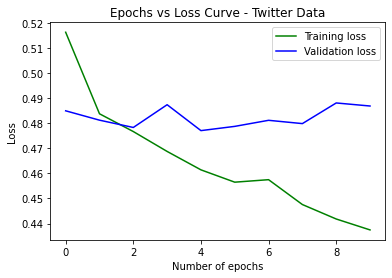

In [135]:
plt.plot(epochs, trainloss_t, color = 'green', label = 'Training loss')
plt.plot(epochs, valloss_t, color = 'blue', label = 'Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss Curve - Twitter Data')
plt.legend()
plt.show()

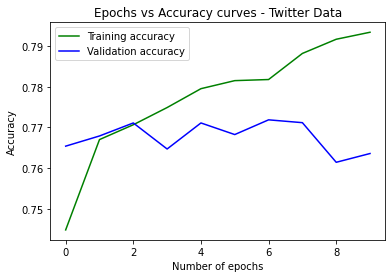

In [136]:
plt.plot(epochs, trainacc_t, color = 'green', label = 'Training accuracy')
plt.plot(epochs, valacc_t, color = 'blue', label = 'Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy curves - Twitter Data')
plt.legend()
plt.show()

In [155]:
trainloss_ta = history_ta.history['loss']
trainacc_ta = history_ta.history['accuracy']
valloss_ta = history_ta.history['val_loss']
valacc_ta = history_ta.history['val_accuracy']

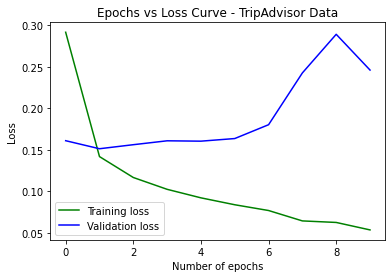

In [156]:
plt.plot(epochs, trainloss_ta, color = 'green', label = 'Training loss')
plt.plot(epochs, valloss_ta, color = 'blue', label = 'Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss Curve - TripAdvisor Data')
plt.legend()
plt.show()

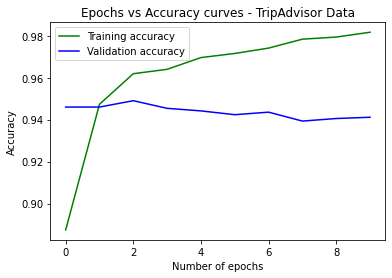

In [157]:
plt.plot(epochs, trainacc_ta, color = 'green', label = 'Training accuracy')
plt.plot(epochs, valacc_ta, color = 'blue', label = 'Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy curves - TripAdvisor Data')
plt.legend()
plt.show()

In [167]:
trainloss_a = history_a.history['loss']
trainacc_a = history_a.history['accuracy']
valloss_a = history_a.history['val_loss']
valacc_a = history_a.history['val_accuracy']

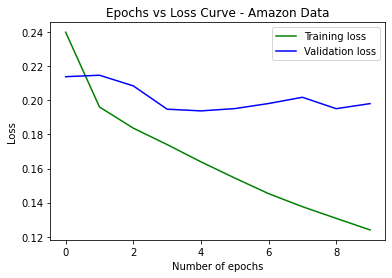

In [168]:
plt.plot(epochs, trainloss_a, color = 'green', label = 'Training loss')
plt.plot(epochs, valloss_a, color = 'blue', label = 'Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss Curve - Amazon Data')
plt.legend()
plt.show()

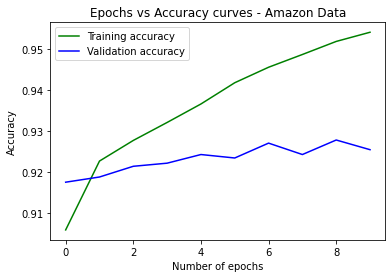

In [169]:
plt.plot(epochs, trainacc_a, color = 'green', label = 'Training accuracy')
plt.plot(epochs, valacc_a, color = 'blue', label = 'Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy curves - Amazon Data')
plt.legend()
plt.show()

In [178]:
trainloss_i = history_i.history['loss']
trainacc_i = history_i.history['accuracy']
valloss_i = history_i.history['val_loss']
valacc_i = history_i.history['val_accuracy']

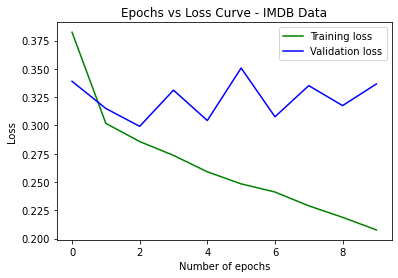

In [179]:
plt.plot(epochs, trainloss_i, color = 'green', label = 'Training loss')
plt.plot(epochs, valloss_i, color = 'blue', label = 'Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss Curve - IMDB Data')
plt.legend()
plt.show()

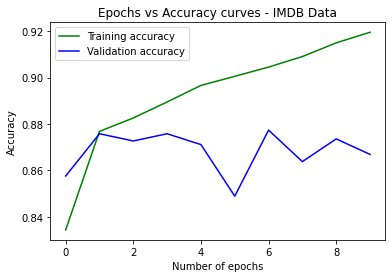

In [180]:
plt.plot(epochs, trainacc_i, color = 'green', label = 'Training accuracy')
plt.plot(epochs, valacc_i, color = 'blue', label = 'Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy curves - IMDB Data')
plt.legend()
plt.show()

### Ensemble:

Reference: https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

In [37]:
all_models = list()
model_a = load_model('/content/drive/MyDrive/CU/6502/models/model_a.h5')
all_models.append(model_a)
model_t = load_model('/content/drive/MyDrive/CU/6502/models/model_t.h5')
all_models.append(model_t)
model_ta = load_model('/content/drive/MyDrive/CU/6502/models/model_ta.h5')
all_models.append(model_ta)
model_i = load_model('/content/drive/MyDrive/CU/6502/models/model_i.h5')
all_models.append(model_i)

In [38]:
print(len(all_models))

4


In [171]:
model_a.evaluate(taX_test, taY_test)

58/58 [==============================] - 1s 14ms/step - loss: 0.8373 - accuracy: 0.7329


[0.8372775912284851, 0.7329328060150146]

In [186]:
# individual model accuracies on amazon test set
#amazon model
#twitter model
#tripadvisor model
#imdb model
for model in all_models:
	i, acc = model.evaluate(aX_test, aY_test)
	print('Model Accuracy: %.3f' % acc)

411/411 [==============================] - 4s 9ms/step - loss: 0.1877 - accuracy: 0.9294
Model Accuracy: 0.929
411/411 [==============================] - 3s 8ms/step - loss: 0.9918 - accuracy: 0.4801
Model Accuracy: 0.480
411/411 [==============================] - 3s 8ms/step - loss: 0.9797 - accuracy: 0.7314
Model Accuracy: 0.731
411/411 [==============================] - 3s 8ms/step - loss: 1.3937 - accuracy: 0.4239
Model Accuracy: 0.424


In [187]:
# individual model accuracies on twitter test set
#amazon model
#twitter model
#tripadvisor model
#imdb model
for model in all_models:
	i, acc = model.evaluate(tX_test, tY_test, verbose=0)
	print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.518
Model Accuracy: 0.760
Model Accuracy: 0.483
Model Accuracy: 0.477


In [188]:
# individual model accuracies on tripadvisor test set
#amazon model
#twitter model
#tripadvisor model
#imdb model
for model in all_models:
	i, acc = model.evaluate(taX_test, taY_test, verbose=0)
	print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.733
Model Accuracy: 0.486
Model Accuracy: 0.936
Model Accuracy: 0.431


In [189]:
# individual model accuracies on imdb test set
#amazon model
#twitter model
#tripadvisor model
#imdb model
for model in all_models:
	i, acc = model.evaluate(iX_test, iY_test, verbose=0)
	print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.511
Model Accuracy: 0.486
Model Accuracy: 0.493
Model Accuracy: 0.864


In [28]:
ind_acc = [0.93, 0.76, 0.94, 0.86]
ind_mod = ["Amazon", "Twitter", "TripAdvisor", "IMDB"]

In [ ]:
!pip3 install matplotlib==3.4

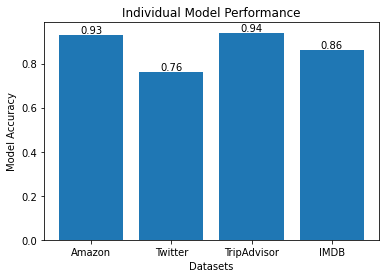

In [29]:
plt.bar(ind_mod,ind_acc, color = 'green')
bars = plt.bar(ind_mod, ind_acc)
plt.bar_label(bars)
plt.xlabel('Datasets')
plt.ylabel("Model Accuracy")
plt.title("Individual Model Performance")
# addlabels(ind_mod, time)
plt.show()

In [30]:
from numpy import dstack
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Stacked Ensemble

In [31]:
def stacked_dataset(all, X):
	stack_X = None
	for model in all:
		pred = model.predict(X, verbose=0)
		if stack_X is None:
			stack_X = pred
		else:
			stack_X = dstack((stack_X, pred))
	#  reshaping to allow ensemble training on each ind model prediction
	stack_X = stack_X.reshape((stack_X.shape[0], stack_X.shape[1]*stack_X.shape[2]))
	return stack_X

In [39]:
stacked_dataset(all_models, cX_train)

array([[0.8863446 , 0.56218415, 0.2751312 , 0.07595285],
       [0.99853325, 0.29215196, 0.0435836 , 0.01113325],
       [0.96101296, 0.54065615, 0.08170652, 0.4302318 ],
       ...,
       [0.86029655, 0.48861644, 0.9739344 , 0.09348428],
       [0.35060632, 0.6870126 , 0.880556  , 0.40239152],
       [0.99173015, 0.8501344 , 0.8952125 , 0.6745115 ]], dtype=float32)

In [40]:
def fit_stacked_model(members, inputX, inputY):
	#dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	model = LogisticRegression() #using logreg to get ensemble pred
	his = model.fit(stackedX, inputY)
	return model

In [41]:
model_ensemble = fit_stacked_model(all_models, cX_train, cY_train)

In [42]:
import pickle

In [43]:
filename = '/content/drive/MyDrive/CU/6502/models/model_ensemble.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://b5872ac7-b20b-4838-a925-8deebfce5889/assets


INFO:tensorflow:Assets written to: ram://b5872ac7-b20b-4838-a925-8deebfce5889/assets


In [44]:
def ensemble_prediction(members, model, inputX):
	# create test set using ensemble
	stackedX = stacked_dataset(members, inputX)
	pred = model.predict(stackedX)
	return pred

In [47]:
pred = ensemble_prediction(all_models, model_ensemble, TEST_X)
acc = accuracy_score(TEST_Y, pred)
print(acc)
print('Stacked Ensemble Accuracy on previously unseen data: %.3f' % acc)


0.8012367491166078
Stacked Ensemble Accuracy on previously unseen data: 0.801


In [59]:
a_ens_pred = ensemble_prediction(all_models, model_ensemble, aX_test)
a_ens_acc = accuracy_score(aY_test, a_ens_pred)
print("Ensemble performance on Amazon test set: ", a_ens_acc)

Ensemble performance on Amazon test set:  0.8436786855317207


In [60]:
t_ens_pred = ensemble_prediction(all_models, model_ensemble, tX_test)
t_ens_acc = accuracy_score(tY_test, t_ens_pred)
print("Ensemble performance on Twitter test set: ", t_ens_acc)

Ensemble performance on Twitter test set:  0.5043125


In [61]:
ta_ens_pred = ensemble_prediction(all_models, model_ensemble, taX_test)
ta_ens_acc = accuracy_score(taY_test, ta_ens_pred)
print("Ensemble performance on TripAdvisor test set: ", ta_ens_acc)

Ensemble performance on TripAdvisor test set:  0.8137629710540688


In [62]:
i_ens_pred = ensemble_prediction(all_models, model_ensemble, iX_test)
i_ens_acc = accuracy_score(iY_test, i_ens_pred)
print("Ensemble performance on IMDB test set: ", i_ens_acc)

Ensemble performance on IMDB test set:  0.5038


In [63]:
ens_acc = [a_ens_acc, t_ens_acc, ta_ens_acc, i_ens_acc]

In [64]:
data_acc = ['Amazon', 'Twitter', 'TripAdvisor', 'IMDB']

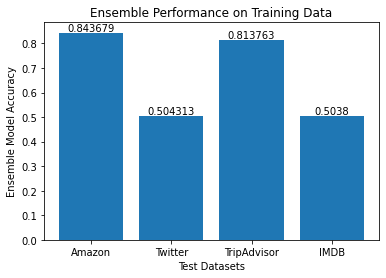

In [65]:
plt.bar(data_acc,ens_acc, color = 'mediumorchid')
bars = plt.bar(data_acc, ens_acc)
plt.bar_label(bars)
plt.xlabel('Test Datasets')
plt.ylabel("Ensemble Model Accuracy")
plt.title("Ensemble Performance on Training Data")
# addlabels(ind_mod, time)
plt.show()

Accuracy of individual models on previously unseen data

In [48]:
def predict_score(model, input):
  pred = model.predict(input)
  for i in range(len(pred)):
    if pred[i] >= 0.5:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [50]:
# Performance of each individual model on new test set
a_pred = predict_score(model_a, TEST_X)
t_pred = predict_score(model_t, TEST_X)
ta_pred = predict_score(model_ta, TEST_X)
i_pred = predict_score(model_i, TEST_X)

In [66]:
a_acc = accuracy_score(TEST_Y, a_pred)
t_acc = accuracy_score(TEST_Y, t_pred)
ta_acc = accuracy_score(TEST_Y, ta_pred)
i_acc = accuracy_score(TEST_Y, i_pred)

In [67]:
accuracies = [a_acc, t_acc, ta_acc, i_acc, acc]
models = ["Amazon", "Twitter", "TripAdvisor", "IMDB", "Ensemble"]

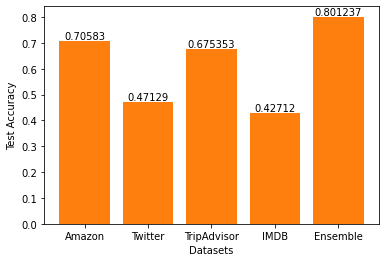

In [72]:
plt.bar(models,accuracies)
bars = plt.bar(models, accuracies)
plt.bar_label(bars)
plt.xlabel('Datasets')
plt.ylabel("Test Accuracy")
plt.show()




In [73]:
runtime = [240, 299, 33, 92, 268]

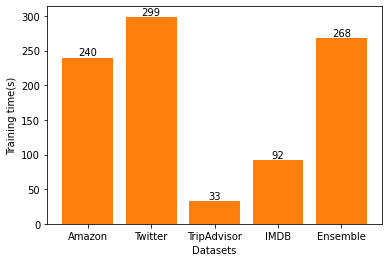

In [74]:
plt.bar(models,runtime)
bars = plt.bar(models, runtime)
plt.bar_label(bars)
plt.xlabel('Datasets')
plt.ylabel("Training time(s)")
plt.show()

